

# 1. Calendar Problem
Language restriction: None -- Please write it in your most comfortable language

You are given the following information, but you may prefer to do some research for yourself.

1 Jan 1900 was a Monday. \
Thirty days has September, \
April, June and November. \
All the rest have thirty-one, \
Saving February alone, \
Which has twenty-eight, rain or shine. \
And on leap years, twenty-nine. \
A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400. \
How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [11]:
daylist = [31,28,31,30,31,30,31,31,30,31,30,31]
total=0
count=0
 
for y in range(1900,2001):
    for m in range(12):
        day=daylist[m]
        if y%4==0 and m==1: 
            day+=1
        for d in range(day):
            if y>1900 and d==0 and total%7==6:
                count+=1
            total+=1
 
print(total,count)

36891 171


# 2. Base Converter
Language Requirement: Python

Implement the `_convert` method of the following class:



In [141]:
class Transformer(object):
    """Convert numbers from base 10 integers to base N strings and back again.
    Sample usage:
    >>> base20 = Transformer('0123456789abcdefghij')
    >>> base20.from_decimal(1234)
    '31e'
    >>> base20.to_decimal('31e')
    1234
    """
    decimal_digits = '0123456789'
    def __init__(self, digits):
        self.digits = digits
    def from_decimal(self, i):
        return self._convert(i, self.decimal_digits, self.digits)
    def to_decimal(self, s):
        return int(self._convert(s, self.digits, self.decimal_digits))
    
    def _convert(self, number, fromdigits, todigits):
        print(number, "fromdigits/decimal_digits :", fromdigits, "todigits:", todigits)
        if str(number)[0] == '-':
            number = str(number)[1:]
            neg = 1
        else:
            neg = 0

        # make an integer out of the number
        x = 0
        for digit in str(number):
            x = x * len(fromdigits) + fromdigits.index(digit)

        # create the result in base 'len(todigits)'
        if x == 0:
            res = todigits[0]
        else:
            res = ""
            while x > 0:
                digit = x % len(todigits)
                res = todigits[digit] + res
                x = int(x / len(todigits))
            if neg:
                res = '-' + res
        return res

        
binary_transformer = Transformer('01')
hex_transformer = Transformer('0123456789ABCDEF')
base62_transformer = Transformer('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789abcdefghijklmnopqrstuvwxyz')

In [142]:
binary_transformer._convert(1234, '0123456789', '0123456789abcdefghij'), binary_transformer._convert('31e', '0123456789abcdefghij', '0123456789')

1234 fromdigits/decimal_digits : 0123456789 todigits: 0123456789abcdefghij
31e fromdigits/decimal_digits : 0123456789abcdefghij todigits: 0123456789


('31e', '1234')

In [100]:
binary_transformer = Transformer('01')
base20.from_decimal(1234)
base20.to_decimal('31e')

01


1234

# 3. Dataset
Language Requirement: None

This question is an open-question to gauge your ability to understand a dataset and your
approach to extract value from it.

No code is required and there is no single-right answer, you are free to elaborate on any
infrastructure or data-structure that you deem valid for this use case.

You are given the attached dataset of price information for products. You are then asked to
“normalize” and extract value out of this dataset.


How would you normalize (parsing, pre-processing, grouping) this data to simplify it’s processing into a database ?
What additional value can you extract from this dataset ? If you find any please explain how would you collect it (pseudo-algorithm)
How would you approach the script of putting this information into a database ?(Concurrency, Scale, Prerequisites, etc..)

This assignment will be due before March 7 23:59, 2022 . Please make sure to submit your work before then.

In [14]:
import pandas as pd

df = pd.read_csv('Dataset_-_Dataset.csv')
df.head(10)

,Product,Country,Variety,Grades,Region,2020-11-16,2020-11-09,2020-11-02,2020-10-26,2020-10-19,...,2018-01-29,2018-01-22,2018-01-15,2018-01-08,2018-01-01,2017-12-25,2017-12-18,2017-12-11,2017-12-04,2017-11-27
0,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Second Quality,"Pedro Aguirre Cerda, Santiago",4.15,4.34,4.36,4.59,4.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Second Quality,"La Calera, Quillota",5.05,9.41,4.22,3.79,4.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Second Quality,Araucania,5.35,4.41,4.38,4.56,4.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / First Quality,Araucania,5.67,5.57,4.69,5.09,4.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / First Quality,"La Calera, Quillota",4.81,4.82,5.23,4.63,4.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / First Quality,"Pedro Aguirre Cerda, Santiago",4.90,5.40,4.64,4.44,4.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Special Quality,"Pedro Aguirre Cerda, Santiago",5.08,4.83,5.30,4.89,4.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Third Quality,"La Calera, Quillota",3.68,4.16,4.11,4.12,3.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Special Quality,Araucania,5.62,5.68,5.22,5.13,5.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Avocado (#99),Chile,Avocado / Variety / Hass,Avocado / Grade / Third Quality,"Pedro Aguirre Cerda, Santiago",3.81,3.95,4.14,4.17,4.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [24]:
# 농작물 종류 확인
df.Product.value_counts()

Avocado (#99)        302
Apple (#97)          201
Garlic (#239)        128
Tomato (#260)        100
Strawberry (#140)     21
Name: Product, dtype: int64

In [117]:
# 국가 종류 확인
df.Variety.value_counts()

Avocado / Variety / Hass                                          236
Apple / Variety / Gala                                            201
Tomato / Variety / Cherry Varieties (=Cerises)                     84
Avocado / Variety / Edranol                                        36
Garlic / Variety / Nanji                                           26
Avocado / Variety / Negra de La Cruz                               16
Tomato / Variety / Plum Varieties - Roma (Heirloom)                16
Garlic / Variety / Asiatic Garlic - Daeseo                         10
Garlic / Variety / Namdo                                           10
Garlic / Variety / Sun Nanji                                       10
Avocado / Variety / Hybrid - Fuerte                                 8
Avocado / Variety / Champion                                        6
Strawberry / Variety / Camarosa (=Kamaroza)                         6
Garlic / Variety / Hanji                                            4
Garlic / Variety / S

In [118]:
df.Grades.value_counts()

Avocado / Grade / Second Quality                                     82
Avocado / Grade / First Quality                                      70
Garlic / Grade / Medium Quality                                      62
Garlic / Grade / High Quality                                        58
Avocado / Grade / Special Quality                                    55
Avocado / Grade / Third Quality                                      36
Avocado / Grade / First Quality - New                                34
Avocado / Grade / Fourth Quality                                     13
Apple / Grade / U.S. No.1                                            10
Garlic / Grade / Low Quality                                          7
Avocado / Grade / Fourth Quality - New                                6
Apple / Variety / U.S. One                                            5
Apple / Grade / California Extra Fancy                                3
Avocado / Grade / Third Quality - New                           

In [42]:
num_df = df[df.columns[5:]]
num_df

,2020-11-16,2020-11-09,2020-11-02,2020-10-26,2020-10-19,2020-10-12,2020-10-05,2020-09-28,2020-09-21,2020-09-14,...,2018-01-29,2018-01-22,2018-01-15,2018-01-08,2018-01-01,2017-12-25,2017-12-18,2017-12-11,2017-12-04,2017-11-27
0,4.15,4.34,4.36,4.59,4.74,4.34,3.91,4.17,4.47,4.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.05,9.41,4.22,3.79,4.51,3.91,4.11,4.24,4.76,4.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.35,4.41,4.38,4.56,4.14,4.56,4.53,4.93,4.47,4.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.67,5.57,4.69,5.09,4.81,4.69,4.75,4.51,5.00,5.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.81,4.82,5.23,4.63,4.83,5.12,4.68,5.08,4.76,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
num_df['Product'] = df['Product']
num_df

<ipython-input-43-41eec816ca5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Product'] = df['Product']


,2020-11-16,2020-11-09,2020-11-02,2020-10-26,2020-10-19,2020-10-12,2020-10-05,2020-09-28,2020-09-21,2020-09-14,...,2018-01-22,2018-01-15,2018-01-08,2018-01-01,2017-12-25,2017-12-18,2017-12-11,2017-12-04,2017-11-27,Product
0,4.15,4.34,4.36,4.59,4.74,4.34,3.91,4.17,4.47,4.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avocado (#99)
1,5.05,9.41,4.22,3.79,4.51,3.91,4.11,4.24,4.76,4.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avocado (#99)
2,5.35,4.41,4.38,4.56,4.14,4.56,4.53,4.93,4.47,4.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avocado (#99)
3,5.67,5.57,4.69,5.09,4.81,4.69,4.75,4.51,5.00,5.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avocado (#99)
4,4.81,4.82,5.23,4.63,4.83,5.12,4.68,5.08,4.76,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Avocado (#99)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strawberry (#140)
748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strawberry (#140)
749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strawberry (#140)
750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strawberry (#140)


In [46]:
num_df.groupby(num_df['Product']).describe().T

Product           Apple (#97)  Avocado (#99)  Garlic (#239)  \
2020-11-16 count     2.000000      54.000000      42.000000   
           mean      2.540000       4.684444       5.551905   
           std       0.480833       0.680695       1.604977   
           min       2.200000       3.180000       1.160000   
           25%       2.370000       4.142500       4.705000   
...                       ...            ...            ...   
2017-11-27 min       1.270000       1.620000       4.630000   
           25%       1.827500       2.490000       5.587500   
           50%       2.380000       3.055000       6.150000   
           75%       2.660000       3.485000       6.522500   
           max       3.080000       4.550000       8.750000   

Product           Strawberry (#140)  Tomato (#260)  
2020-11-16 count           5.000000      20.000000  
           mean            2.368000       3.585500  
           std             1.001409       1.043917  
           min             1.680000       2.230000  
           25%             1.830000       2.785000  
...                             ...            ...  
2017-11-27 min             2.330000       1.210000  
           25%             2.330000       1.820000  
           50%             2.330000       2.030000  
           75%             2.330000       2.510000  
           max             2.330000       4.890000  

[1248 rows x 5 columns]

In [58]:
speci_df = num_df.groupby(num_df['Product']).mean().T
speci_df.

Product,Apple (#97),Avocado (#99),Garlic (#239),Strawberry (#140),Tomato (#260)
2020-11-16,2.540000,4.684444,5.551905,2.368000,3.585500
2020-11-09,2.377158,4.796667,5.468810,2.176667,3.016667
2020-11-02,2.347053,4.524810,5.299286,1.775000,2.952381
2020-10-26,2.280396,4.495946,5.283077,1.798333,2.942500
2020-10-19,2.272500,4.248214,5.344359,1.645000,3.072632
...,...,...,...,...,...
2017-12-25,2.245098,NaN,6.228929,1.825000,3.295833
2017-12-18,2.265660,3.048837,6.261786,2.175000,3.695833
2017-12-11,2.239444,3.009500,6.164375,1.440000,4.035385
2017-12-04,2.231273,2.951500,6.157813,1.890000,3.318000


In [66]:
speci_df.fillna(0)

Product,Apple (#97),Avocado (#99),Garlic (#239),Strawberry (#140),Tomato (#260)
2020-11-16,2.540000,4.684444,5.551905,2.368000,3.585500
2020-11-09,2.377158,4.796667,5.468810,2.176667,3.016667
2020-11-02,2.347053,4.524810,5.299286,1.775000,2.952381
2020-10-26,2.280396,4.495946,5.283077,1.798333,2.942500
2020-10-19,2.272500,4.248214,5.344359,1.645000,3.072632
...,...,...,...,...,...
2017-12-25,2.245098,0.000000,6.228929,1.825000,3.295833
2017-12-18,2.265660,3.048837,6.261786,2.175000,3.695833
2017-12-11,2.239444,3.009500,6.164375,1.440000,4.035385
2017-12-04,2.231273,2.951500,6.157813,1.890000,3.318000


In [90]:
speci_df = speci_df.sort_index(ascending=True)
speci_df

Product,level_0,index,Apple (#97),Avocado (#99),Garlic (#239),Strawberry (#140),Tomato (#260)
0,0,2017-11-27,2.285556,2.994250,6.173125,2.330000,2.308824
1,1,2017-12-04,2.231273,2.951500,6.157813,1.890000,3.318000
2,2,2017-12-11,2.239444,3.009500,6.164375,1.440000,4.035385
3,3,2017-12-18,2.265660,3.048837,6.261786,2.175000,3.695833
4,4,2017-12-25,2.245098,NaN,6.228929,1.825000,3.295833
...,...,...,...,...,...,...,...
151,151,2020-10-19,2.272500,4.248214,5.344359,1.645000,3.072632
152,152,2020-10-26,2.280396,4.495946,5.283077,1.798333,2.942500
153,153,2020-11-02,2.347053,4.524810,5.299286,1.775000,2.952381
154,154,2020-11-09,2.377158,4.796667,5.468810,2.176667,3.016667


In [ ]:
# speci_df['Year'] =speci_df.index.datetime.year
# speci_df['Month'] =speci_df.index.dt.month
speci_df['index'] = pd.to_datetime(speci_df['index'], format='%Y-%m-%d')
speci_df['Year'] =speci_df['index'].dt.year
speci_df['Month'] =speci_df['index'].dt.month

In [115]:
speci_df

Product,Apple (#97),Avocado (#99),Garlic (#239),Strawberry (#140),Tomato (#260),Month
Year,,,,,,
2017,2.253406,3.001022,6.197205,1.932000,3.330775,11.800000
2018,2.277382,3.644130,5.684440,1.878506,2.191508,6.528302
2019,2.387719,4.142520,4.437758,2.002527,2.548596,6.615385
2020,2.291153,4.394996,4.077828,1.615651,2.811638,5.869565


In [110]:
speci_df = speci_df.groupby(speci_df['Year']).mean()
speci_df

Product,Apple (#97),Avocado (#99),Garlic (#239),Strawberry (#140),Tomato (#260),Month
Year,,,,,,
2017,2.253406,3.001022,6.197205,1.932000,3.330775,11.800000
2018,2.277382,3.644130,5.684440,1.878506,2.191508,6.528302
2019,2.387719,4.142520,4.437758,2.002527,2.548596,6.615385
2020,2.291153,4.394996,4.077828,1.615651,2.811638,5.869565


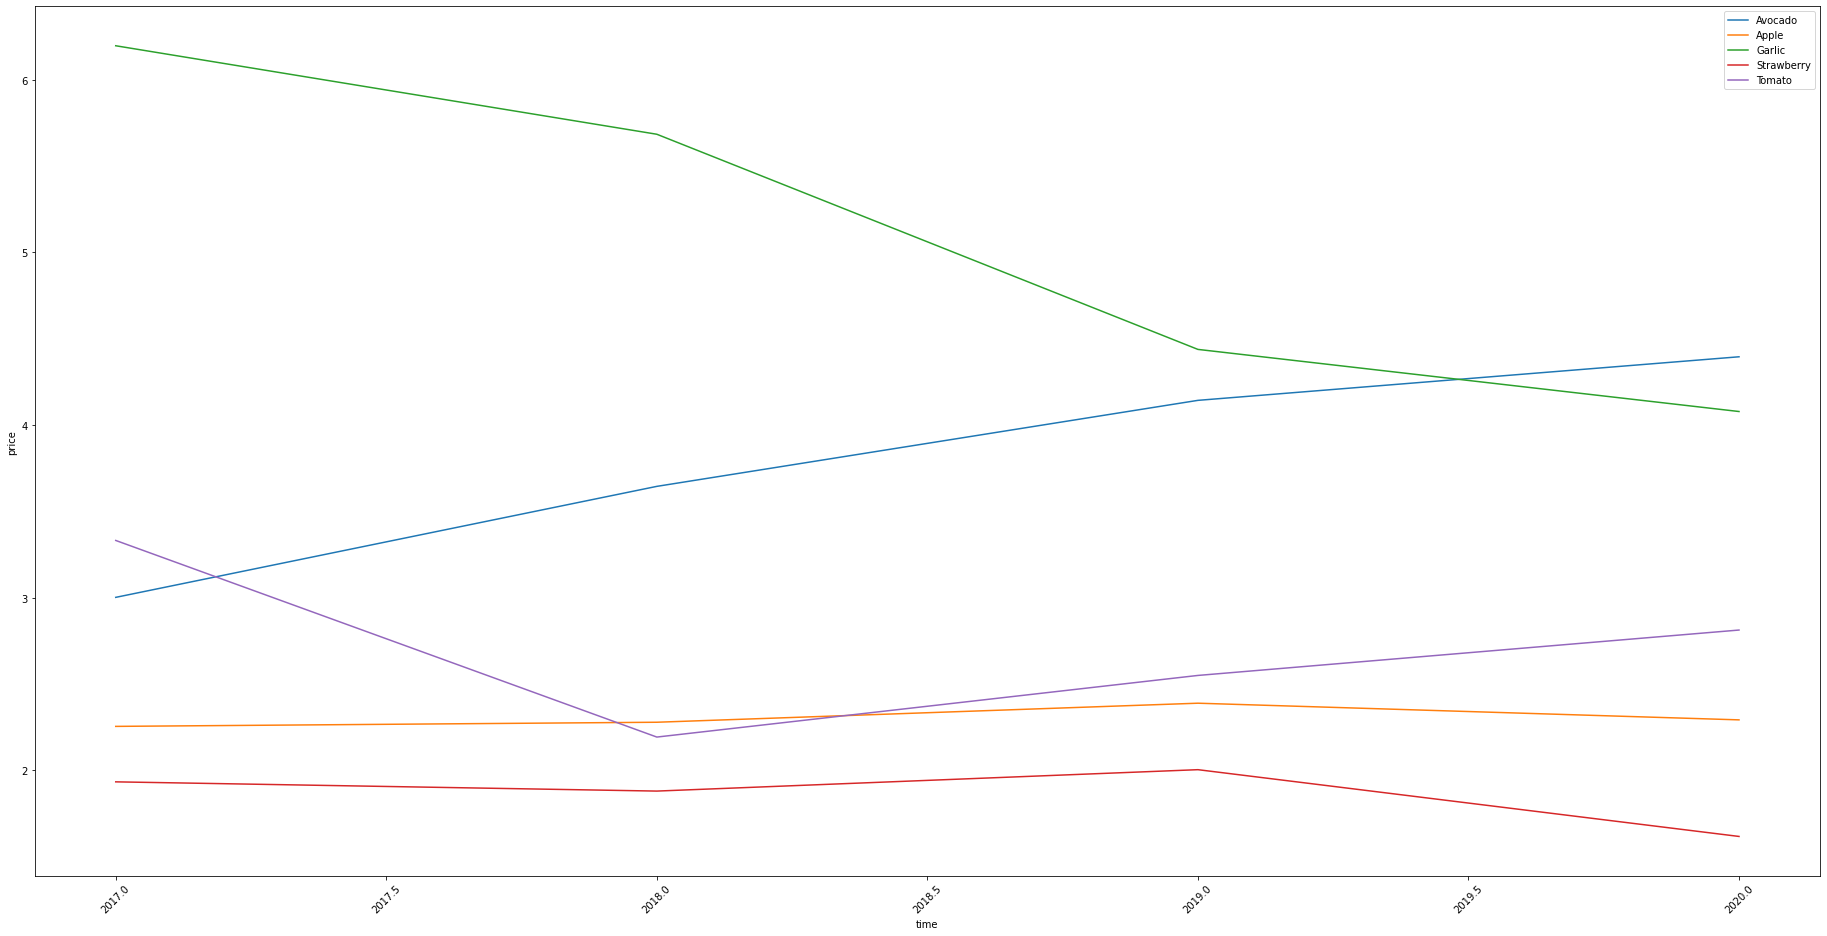

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

plt.figure(figsize=(32, 16))
sns.lineplot(x=speci_df.index, y=speci_df['Avocado (#99)'], label="Avocado")
sns.lineplot(x=speci_df.index, y=speci_df['Apple (#97)'], label="Apple")
sns.lineplot(x=speci_df.index, y=speci_df['Garlic (#239)'], label="Garlic")
sns.lineplot(x=speci_df.index, y=speci_df['Strawberry (#140)'], label="Strawberry")
sns.lineplot(x=speci_df.index, y=speci_df['Tomato (#260)'], label="Tomato")
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show();

=> 시간에 순으로 데이터들을 시각화했다. 
1. Garlic의 경우 2018 ~ 2019 년까지 하락하고 있다. 
2. Tomato의 경우 2017 ~ 2018 년까지 하락하고 그 이후 안정화되었다
3. Avocado의 값은 계속해서 상승하고 있다.
4. Strawberry와 Apple의 값은 변동이 심하지 않았다. 
### 이런식으로 데이터 컬럼들을 그룹화하여 품종에 값이 어떻게 변화하고 있는지 한눈에 확인할 수 있다.
- 품종별, 품목의 등급 데이터 변화 / 지역별 품목에 대한 그룹화를 통해 Price가 어떻게 변화하는지 파악할 수 있다.
